# EDA

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('heart.csv')

## General informations 

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Checking for null values

In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Checking for duplicated values and dropping them


In [7]:
df.duplicated().sum()

723

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().any()

False

### Overall statistics

In [10]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Correlation between features

In [11]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


<AxesSubplot:>

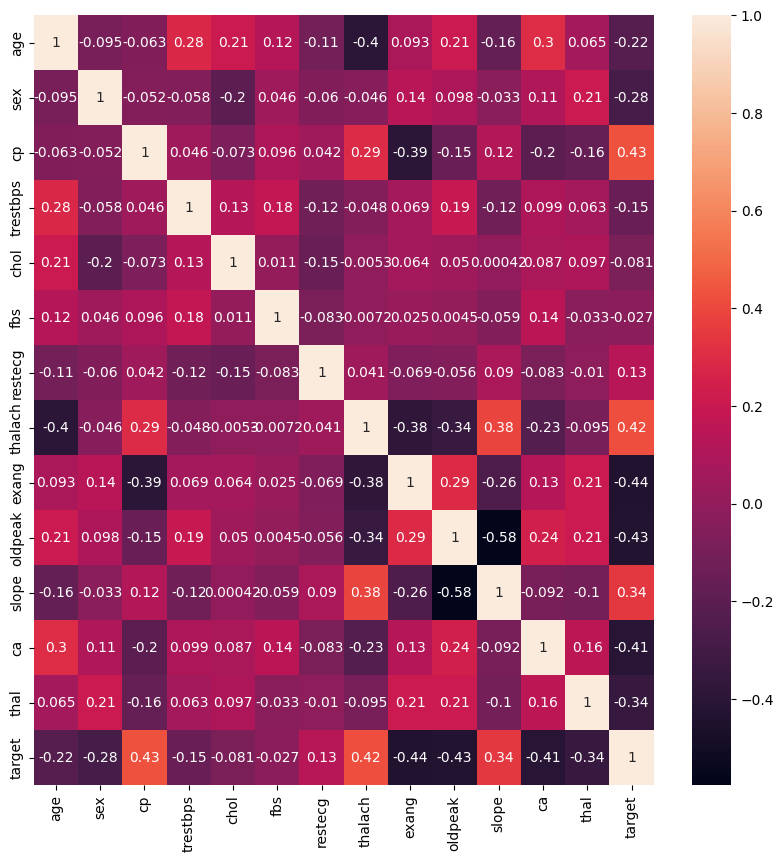

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?

In [13]:
df['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

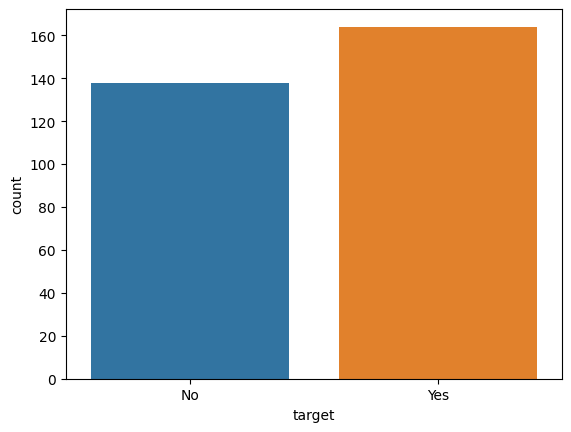

In [14]:
ax=sns.countplot(data=df,x='target')
ax.set_xticklabels(['No','Yes'])

## Find Count of  Male & Female in this Dataset

In [15]:
df['sex'].value_counts()
#1 for male and 0 foor female

1    206
0     96
Name: sex, dtype: int64

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

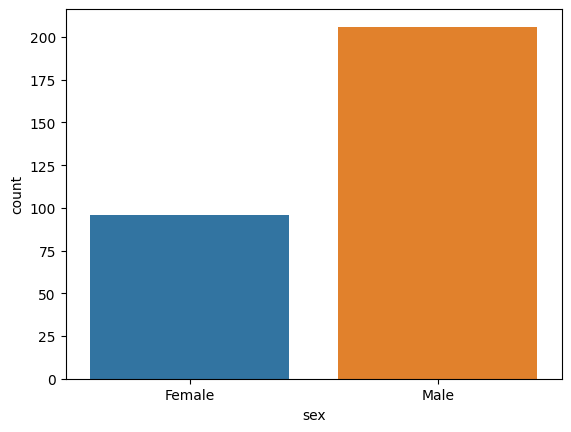

In [16]:
ax=sns.countplot(data=df,x='sex')
ax.set_xticklabels(['Female','Male'])

## Find Gender Distribution According to The Target Variable

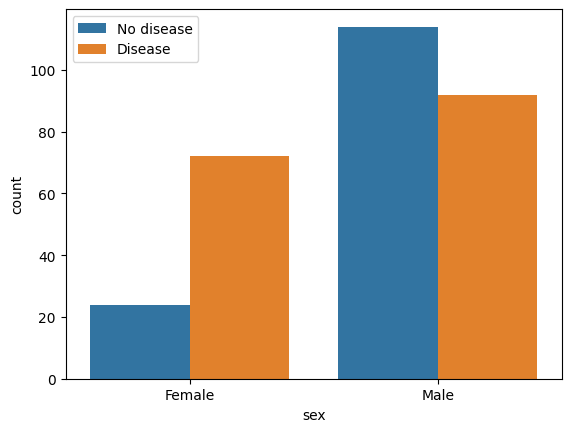

In [17]:
ax=sns.countplot(data=df,x='sex',hue='target')
ax.set_xticklabels(['Female','Male'])
plt.legend(['No disease','Disease'])

## Check Age Distribution In The Dataset

In [18]:
#df['age'].hist()

In [19]:
#sns.histplot(df['age'])

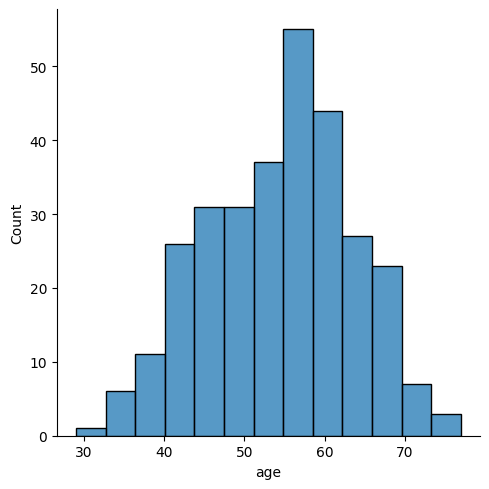

In [20]:
sns.displot(df['age'])

## Check Chest Pain Type

In [21]:
df['cp'].unique()

array([0, 1, 2, 3], dtype=int64)

## Show The Chest Pain Distribution As Per Target Variable

[Text(0, 0, 'No disease'), Text(1, 0, 'Disease')]

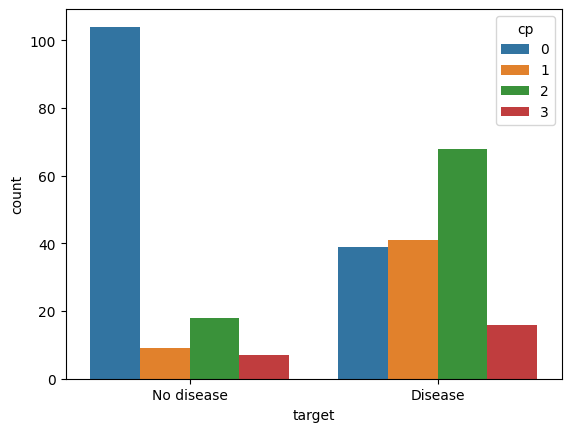

In [22]:
ax=sns.countplot(data=df,x='target',hue='cp')
ax.set_xticklabels(['No disease','Disease'])

## Show Fasting Blood Sugar Distribution According To Target Variable

[Text(0, 0, 'No diabetes'), Text(1, 0, 'Diabetes')]

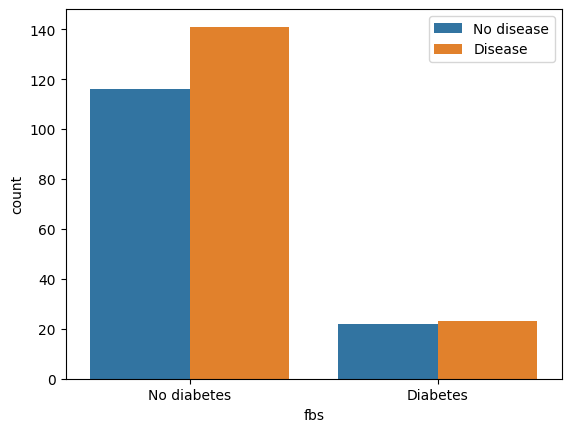

In [23]:
ax=sns.countplot(data=df,x='fbs',hue='target')
plt.legend(['No disease','Disease'])
ax.set_xticklabels(["No diabetes","Diabetes"])

## Check Resting Blood Pressure Distribution

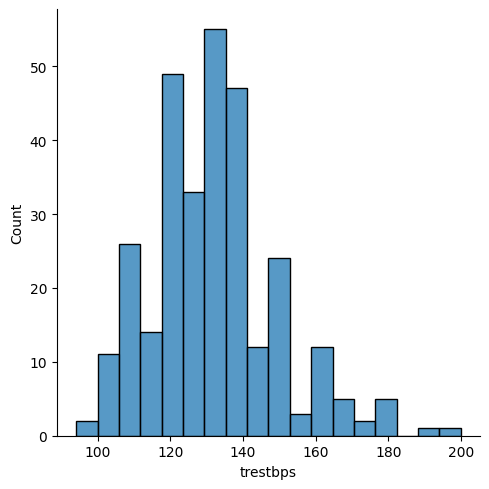

In [24]:
sns.displot(df['trestbps'])

## Compare Resting Blood Pressure As Per Sex Column

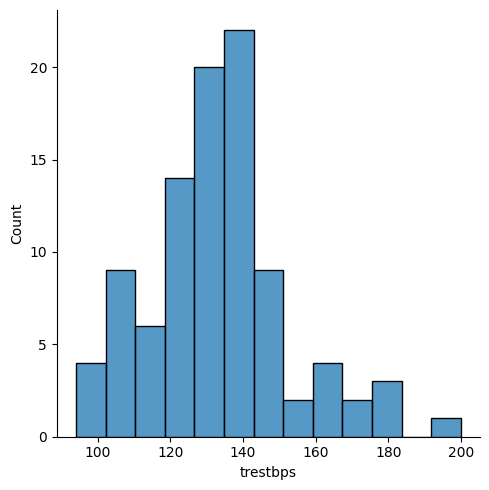

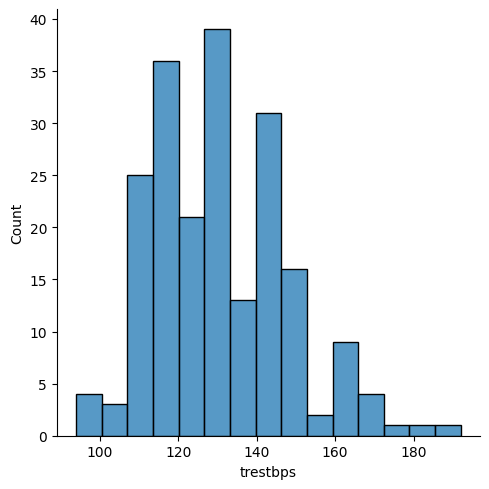

In [25]:
x=df[df['sex']==0]['trestbps']
y=df[df['sex']==1]['trestbps']
sns.displot(x)
sns.displot(y)

C:\Users\nidha\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
C:\Users\nidha\AppData\Roaming\Python\Python39\site-packages\seaborn\axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]


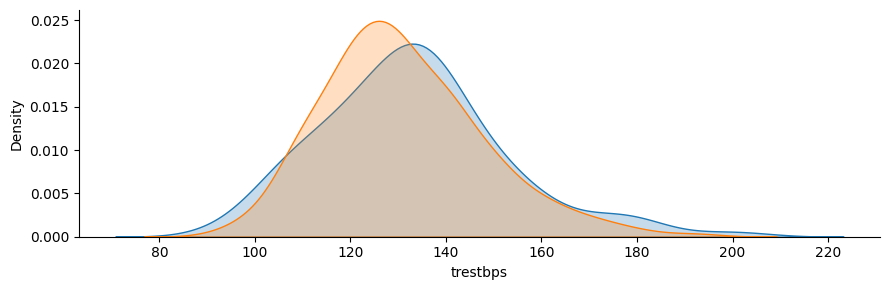

In [26]:
g=sns.FacetGrid(data=df,hue='sex',aspect=3)
g.map(sns.kdeplot,'trestbps',fill=True)

## Show Distribution of Serum cholesterol

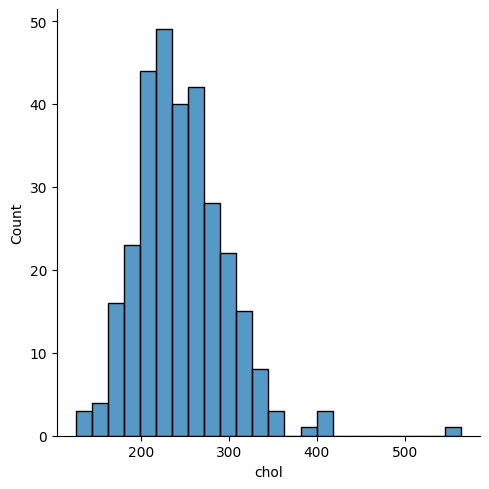

In [27]:
sns.displot(df['chol'])

# Coding categorical variables

In [28]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [29]:
df['sex']

0      1
1      1
2      1
3      1
4      0
      ..
723    0
733    0
739    1
843    1
878    1
Name: sex, Length: 302, dtype: int64

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [31]:
categorical=[]
numerical=[]
for col in df.columns :
    if df[col].nunique()<=10 :
        categorical.append(col)
    else :
        numerical.append(col)
categorical.remove('sex')
categorical.remove('target')

In [32]:
numerical

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [33]:
df=pd.get_dummies(df,columns=categorical,drop_first=True)

In [34]:
df.columns

Index(['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target',
       'cp_1', 'cp_2', 'cp_3', 'fbs_1', 'restecg_1', 'restecg_2', 'exang_1',
       'slope_1', 'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')

### Feature scaling  

In [35]:
!pip install sklearn
from sklearn.preprocessing import StandardScaler

In [36]:
st=StandardScaler()
df[numerical]=st.fit_transform(df[numerical])

In [37]:
df.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


### Getting the matrix of feature and the target vector

In [38]:
X=df.drop('target',axis=1)

In [39]:
X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


In [40]:
y=df['target']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
df.shape

(302, 23)

In [43]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model training

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

### Logistic regression

In [47]:
lr=LogisticRegression()

In [49]:
lr.fit(X_train,y_train)

LogisticRegression()

In [50]:
lr_pred=lr.predict(X_test)

In [52]:
lr_acc=accuracy_score(y_test,lr_pred)

### Support Vector Classifier

In [54]:
svc=SVC()

In [56]:
svc.fit(X_train,y_train)

SVC()

In [59]:
svc_pred=svc.predict(X_test)

In [60]:
svc_acc=accuracy_score(y_test,svc_pred)

### KNN

#### Looking for the best n

In [73]:
scores=[]
for k in range (1,50) :
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    knn_pred=knn.predict(X_test)
    knn_acc=accuracy_score(y_test,knn_pred)
    scores.append(knn_acc)
#sorted(scores)
scores

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7377049180

In [ ]:
#2,6 and 8 are the ebst values for k

In [75]:
knn=KNeighborsClassifier(n_neighbors=2)

In [76]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [77]:
knn_pred=knn.predict(X_test)

In [78]:
knn_acc=accuracy_score(y_test,knn_pred)

## Non-linear algorithms

###  No need for preprocessing

In [79]:
df=pd.read_csv('heart.csv')

In [81]:
df.drop_duplicates(inplace=True)

In [82]:
df.shape

(302, 14)

In [85]:
X=df.drop('target',axis=1)
y=df['target']

In [86]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Decision tree classifier

In [87]:
from sklearn.tree import DecisionTreeClassifier

In [88]:
dtc=DecisionTreeClassifier()

In [89]:
dtc.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
dtc_pred=dtc.predict(X_test)

In [92]:
dtc_acc=accuracy_score(y_test,dtc_pred)

### Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
rfc=RandomForestClassifier()

In [95]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [96]:
rfc_pred=rfc.predict(X_test)

In [97]:
rfc_acc=accuracy_score(y_test,rfc_pred)

### Gradient Boosting Classifier

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gbc=GradientBoostingClassifier()

In [100]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [101]:
gbc_pred=gbc.predict(X_test)

In [102]:
gbc_acc=accuracy_score(y_test,gbc_pred)

## Comparing models accuracy

In [103]:
accuracy_scores=[lr_acc,svc_acc,knn_acc,dtc_acc,rfc_acc,gbc_acc]

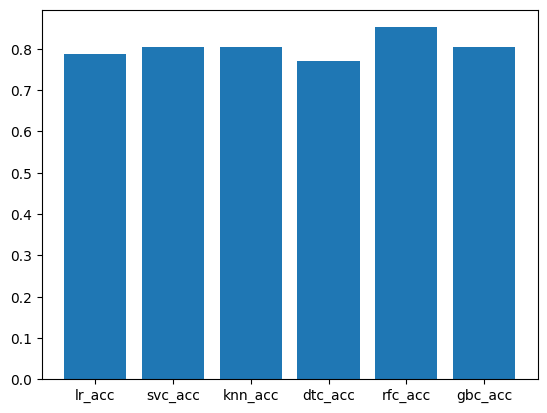

In [111]:
plt.bar(height=accuracy_scores,x=['lr_acc','svc_acc','knn_acc','dtc_acc','rfc_acc','gbc_acc'])
plt.show()

#### Random Forest Classifier is the best performing model in terms of accuracy

In [112]:
rfc_acc

0.8524590163934426

In [113]:
rfc=RandomForestClassifier()

In [114]:
rfc.fit(X,y)

RandomForestClassifier()

In [116]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [123]:
new_val={'age' : 60, 'sex' : 1, 'cp':2 , 'trestbps':140, 'chol':388, 'fbs':0, 'restecg':1, 'thalach':190,
       'exang':0, 'oldpeak':3.7, 'slope':2, 'ca':3, 'thal':2}
new_val=pd.DataFrame(new_val,index=[0])
new_val

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,60,1,2,140,388,0,1,190,0,3.7,2,3,2


In [125]:
rfc.predict(new_val)[0]

0

In [115]:
import joblib

In [126]:
joblib.dump(rfc,'random_forest_model.pkl')

['random_forest_model.pkl']